In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_csv('Investment Case - Train.csv')
#Printing head
df.head(25)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2
7,7,25-08-2012 07:00,2
8,8,25-08-2012 08:00,6
9,9,25-08-2012 09:00,2


In [2]:
df.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [3]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
df = pd.read_csv('Investment Case - Train.csv', nrows = 11856)

#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df[0:10392] 
test=df[10392:]

In [4]:
df.Timestamp = pd.to_datetime(df.Datetime, format = '%d-%m-%Y %H:%M')
df.index = df.Timestamp
df = df.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

C:\Users\Ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\Ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\Users\Ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [5]:
df

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000
...,...,...
2013-12-27,11747.5,161.166667
2013-12-28,11771.5,128.500000
2013-12-29,11795.5,97.083333


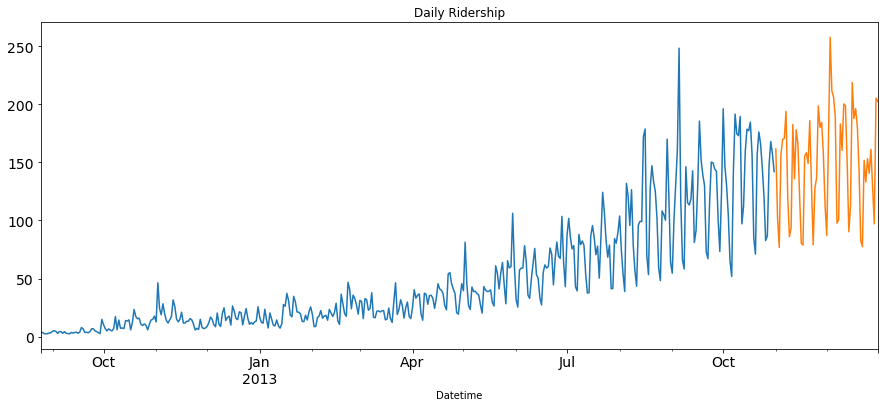

In [6]:
#Plotting data
train.Count.plot(figsize=(15,6), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,6), title= 'Daily Ridership', fontsize=14)
plt.show()

#### Do this incase statsmodels is not installed properly
pip freeze<br>
conda remove statsmodels<br>

##### For Git
git init<br>
git clone git://github.com/statsmodels/statsmodels.git<br>
python setup.py build<br>

##### For Conda prompt
conda install -c conda-forge statsmodels

#### 1. Naive Forecast

In [7]:
train.tail()

,ID,Count
Datetime,,
2013-10-27,10283.5,86.750000
2013-10-28,10307.5,147.333333
2013-10-29,10331.5,167.916667
2013-10-30,10355.5,157.250000
2013-10-31,10379.5,142.000000


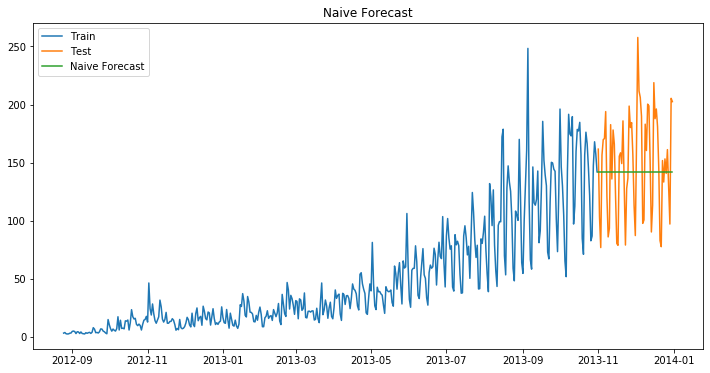

In [8]:
dd= np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]  # to take the last element
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print(rms)

43.91640614391676


#### 2. Simple Average

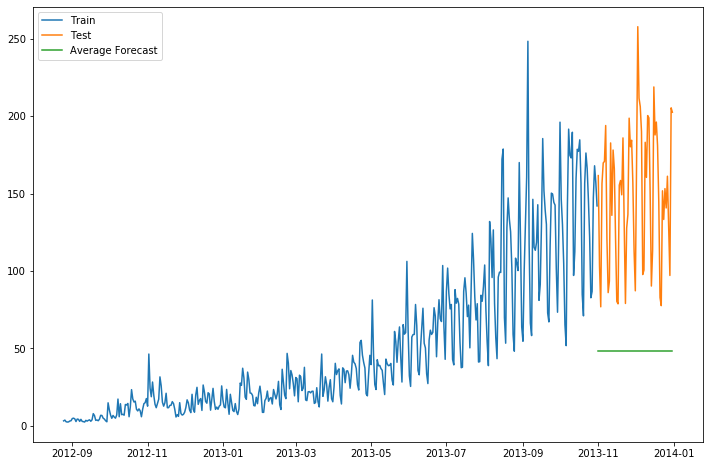

In [10]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [11]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.avg_forecast))
print(rms)

109.88526527082863


#### 3. Moving Average

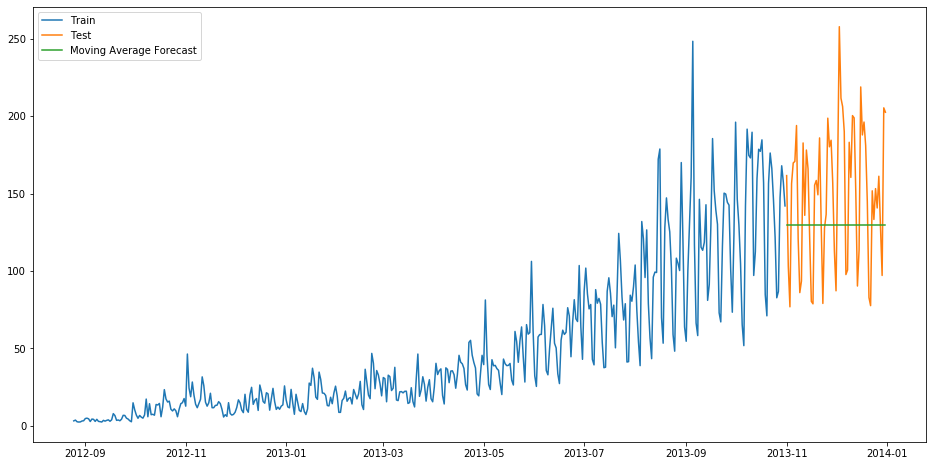

In [12]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(7).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [13]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))
print(rms)

47.67423353762362


#### 4. Simple Exponential Smoothing

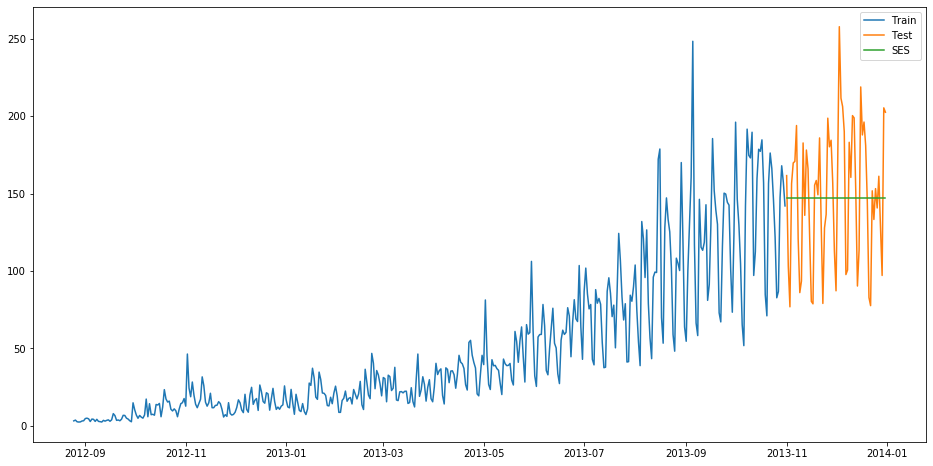

In [14]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=.589,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [15]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SES))
print(rms)

43.3573012637692


In [16]:
ra=np.linspace(0,1,1001)
rm = []
for i in ra:
    f = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=i,optimized=False)
    a = f.forecast(len(test))
    r = sqrt(mean_squared_error(test.Count, a))
    rm.append(r)
rmse_table = pd.DataFrame({'rms':rm, 'alpha':ra})
rmse_table[rmse_table.rms == rmse_table.rms.min()]

,rms,alpha
589,43.357301,0.589


#### 5. Holt's Trend Correction Method

<Figure size 1440x576 with 0 Axes>

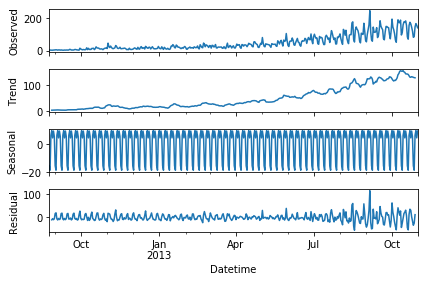

In [17]:
import statsmodels.api as sm
plt.figure(figsize=(20,8))
sm.tsa.seasonal_decompose(train.Count).plot()
plt.show()

In [18]:
result = sm.tsa.stattools.adfuller(train.Count)
print('ADF statistic:{:.3f}'.format(result[0]))
print('p value of ADF test:{:.3f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}:{:.3f}'.format(key, value))

ADF statistic:0.307
p value of ADF test:0.978
Critical Values:
	1%:-3.446
	5%:-2.869
	10%:-2.570


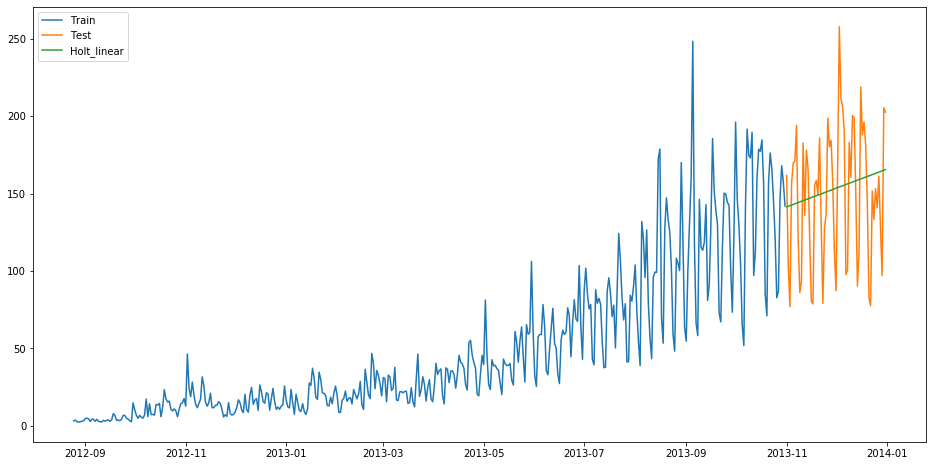

In [19]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) # not necessary to give these values
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [20]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_linear))
print('{}'.format(rms))

43.056259611507286


#### 5. Holt Winters Method

C:\Users\Ashish\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


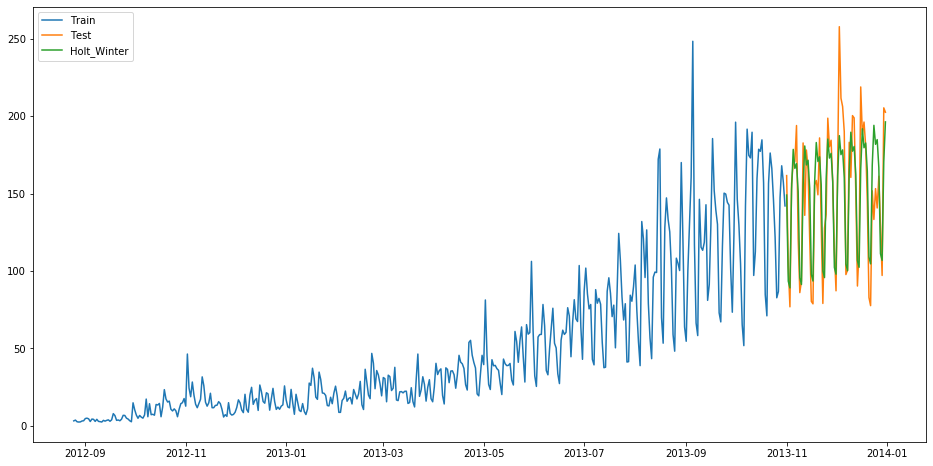

In [21]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7,trend='add', seasonal='add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [22]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_Winter))
print(rms)

23.961492566159794


#### 7. ARIMA

C:\Users\Ashish\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


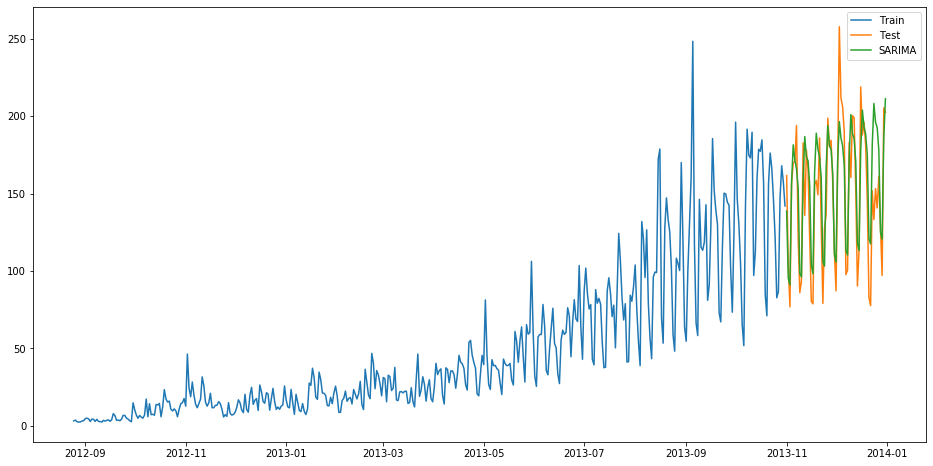

In [23]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(3, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [24]:
fit1.forecast(steps = 10)

2013-11-01    138.685062
2013-11-02     95.321681
2013-11-03     90.972430
2013-11-04    157.295172
2013-11-05    181.430853
2013-11-06    171.673154
2013-11-07    165.899615
2013-11-08    153.539849
2013-11-09     98.402105
2013-11-10     96.119583
Freq: D, dtype: float64

In [25]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SARIMA))
print(rms)

26.00846783757512
